# Washington State House Price Prediction
The real estate markets, like those in Sydney and Melbourne, present an interesting opportunity for data analysts to analyze and predict where property prices are moving towards. Prediction of property prices is becoming increasingly important and beneficial. Property prices are a good indicator of both the overall market condition and the economic health of a country. Considering the data provided, we are wrangling a large set of property sales records stored in an unknown format and with unknown data quality issues

### Loading the data

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
import seaborn as sns

In [3]:
df = pd.read_csv('data.csv')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
date             4600 non-null object
price            4600 non-null float64
bedrooms         4600 non-null float64
bathrooms        4600 non-null float64
sqft_living      4600 non-null int64
sqft_lot         4600 non-null int64
floors           4600 non-null float64
waterfront       4600 non-null int64
view             4600 non-null int64
condition        4600 non-null int64
sqft_above       4600 non-null int64
sqft_basement    4600 non-null int64
yr_built         4600 non-null int64
yr_renovated     4600 non-null int64
street           4600 non-null object
city             4600 non-null object
statezip         4600 non-null object
country          4600 non-null object
dtypes: float64(4), int64(9), object(5)
memory usage: 647.0+ KB


### Data Cleaning

In [6]:
df.waterfront.value_counts()

0    4567
1      33
Name: waterfront, dtype: int64

In [7]:
df.view.value_counts()

0    4140
2     205
3     116
4      70
1      69
Name: view, dtype: int64

In [8]:
df.sqft_above.value_counts().head()

1010    47
1200    47
1300    45
1140    44
1320    43
Name: sqft_above, dtype: int64

In [9]:
df.sqft_basement.value_counts().head()

0      2745
500      53
600      45
800      43
900      41
Name: sqft_basement, dtype: int64

In [10]:
df.view.value_counts()

0    4140
2     205
3     116
4      70
1      69
Name: view, dtype: int64

In [11]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.200336,0.327110,0.430410,0.050451,0.151461,0.135648,0.228504,0.034915,0.367570,0.210427,0.021857,-0.028774
bedrooms,0.200336,1.000000,0.545920,0.594884,0.068819,0.177895,-0.003483,0.111028,0.025080,0.484705,0.334165,0.142461,-0.061082
bathrooms,0.327110,0.545920,1.000000,0.761154,0.107837,0.486428,0.076232,0.211960,-0.119994,0.689918,0.298020,0.463498,-0.215886
sqft_living,0.430410,0.594884,0.761154,1.000000,0.210538,0.344850,0.117616,0.311009,-0.062826,0.876443,0.447206,0.287775,-0.122817
sqft_lot,0.050451,0.068819,0.107837,0.210538,1.000000,0.003750,0.017241,0.073907,0.000558,0.216455,0.034842,0.050706,-0.022730
floors,0.151461,0.177895,0.486428,0.344850,0.003750,1.000000,0.022024,0.031211,-0.275013,0.522814,-0.255510,0.467481,-0.233996
waterfront,0.135648,-0.003483,0.076232,0.117616,0.017241,0.022024,1.000000,0.360935,0.000352,0.078911,0.097501,-0.023563,0.008625
view,0.228504,0.111028,0.211960,0.311009,0.073907,0.031211,0.360935,1.000000,0.063077,0.174327,0.321602,-0.064465,0.022967
condition,0.034915,0.025080,-0.119994,-0.062826,0.000558,-0.275013,0.000352,0.063077,1.000000,-0.178196,0.200632,-0.399698,-0.186818
sqft_above,0.367570,0.484705,0.689918,0.876443,0.216455,0.522814,0.078911,0.174327,-0.178196,1.000000,-0.038723,0.408535,-0.160426


In [12]:
df.yr_renovated.value_counts().head()

0       2735
2000     170
2003     151
2001     109
2009     109
Name: yr_renovated, dtype: int64

In [13]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


### Feature Engineering 

In [14]:
df2= df.drop(['country','yr_renovated'],1)
df2.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,street,city,statezip
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,18810 Densmore Ave N,Shoreline,WA 98133
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,709 W Blaine St,Seattle,WA 98119
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,26206-26214 143rd Ave SE,Kent,WA 98042
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,857 170th Pl NE,Bellevue,WA 98008
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,9105 170th Ave NE,Redmond,WA 98052


In [15]:
h1 = df2.copy()
h2 = df2.copy()

In [16]:
def basement(x):
    if(x>0):
        return 1
    else:
        return 0

In [17]:
basement(23)

1

In [18]:
basement(0)

0

In [19]:
h1['basement'] = h1["sqft_basement"].apply(basement)
h1.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,street,city,statezip,basement
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,18810 Densmore Ave N,Shoreline,WA 98133,0
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,709 W Blaine St,Seattle,WA 98119,1
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,26206-26214 143rd Ave SE,Kent,WA 98042,0
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,857 170th Pl NE,Bellevue,WA 98008,1
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,9105 170th Ave NE,Redmond,WA 98052,1


In [20]:
h1[['price','basement']].corr()

,price,basement
price,1.000000,0.110706
basement,0.110706,1.000000


In [21]:
h1["total_plot"] = h1['sqft_living'] + h1["sqft_lot"]
h1.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,street,city,statezip,basement,total_plot
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,18810 Densmore Ave N,Shoreline,WA 98133,0,9252
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,709 W Blaine St,Seattle,WA 98119,1,12700
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,26206-26214 143rd Ave SE,Kent,WA 98042,0,13877
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,857 170th Pl NE,Bellevue,WA 98008,1,10030
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,9105 170th Ave NE,Redmond,WA 98052,1,12440


In [22]:
h1[['price','total_plot']].corr()

,price,total_plot
price,1.000000,0.061635
total_plot,0.061635,1.000000


#### little insight I get to know that basement and total_plot did not make much change in correlation with price. So let drop the total_plot feature

In [23]:
h1 = h1.drop('total_plot',1)
h1.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,street,city,statezip,basement
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,18810 Densmore Ave N,Shoreline,WA 98133,0
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,709 W Blaine St,Seattle,WA 98119,1
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,26206-26214 143rd Ave SE,Kent,WA 98042,0
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,857 170th Pl NE,Bellevue,WA 98008,1
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,9105 170th Ave NE,Redmond,WA 98052,1


In [24]:
h1.city.value_counts().head()

Seattle     1573
Renton       293
Bellevue     286
Redmond      235
Kirkland     187
Name: city, dtype: int64

In [25]:
h1.street.value_counts().head()

2520 Mulberry Walk NE    4
2500 Mulberry Walk NE    3
11034 NE 26th Pl         2
1610 N 185th St          2
353 N 105th St           2
Name: street, dtype: int64

#### let drop streets as it is not so important as we have a city 
h1 = h1.drop('street',1)

In [26]:
h1.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,street,city,statezip,basement
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,18810 Densmore Ave N,Shoreline,WA 98133,0
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,709 W Blaine St,Seattle,WA 98119,1
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,26206-26214 143rd Ave SE,Kent,WA 98042,0
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,857 170th Pl NE,Bellevue,WA 98008,1
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,9105 170th Ave NE,Redmond,WA 98052,1


In [27]:
h1 = h1.drop('statezip',1)
h1.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,street,city,basement
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,18810 Densmore Ave N,Shoreline,0
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,709 W Blaine St,Seattle,1
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,26206-26214 143rd Ave SE,Kent,0
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,857 170th Pl NE,Bellevue,1
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,9105 170th Ave NE,Redmond,1


In [28]:
h1 = h1.drop('date',1)
h1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,street,city,basement
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,18810 Densmore Ave N,Shoreline,0
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,709 W Blaine St,Seattle,1
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,26206-26214 143rd Ave SE,Kent,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,857 170th Pl NE,Bellevue,1
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,9105 170th Ave NE,Redmond,1


### Outliers Removal 

In [29]:
h1.bedrooms.value_counts()

3.0    2032
4.0    1531
2.0     566
5.0     353
6.0      61
1.0      38
7.0      14
0.0       2
8.0       2
9.0       1
Name: bedrooms, dtype: int64

In [30]:
h1[h1.bedrooms==0]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,street,city,basement
2365,1095000.0,0.0,0.0,3064,4764,3.5,0,2,3,3064,0,1990,814 E Howe St,Seattle,0
3209,1295648.0,0.0,0.0,4810,28008,2.0,0,0,3,4810,0,1990,20418 NE 64th Pl,Redmond,0


#### How can one House be without Bedrooms and having these high values. Consult with the expert and choose to keep it or not. As of now I am droping these columns.

In [31]:
h1.shape

(4600, 15)

In [32]:
# ~ is used to negate or remove the values that follows the condition. This is one of the way to remove the outliers
h1 = h1[~(h1.bedrooms == 0.0)]
h1.shape

(4598, 15)

In [33]:
h1.floors.value_counts()

1.0    2174
2.0    1810
1.5     444
3.0     128
2.5      41
3.5       1
Name: floors, dtype: int64

In [34]:
h1['bedrooms_no'] = h1['bedrooms'].map(lambda x: int(x))
h1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,street,city,basement,bedrooms_no
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,18810 Densmore Ave N,Shoreline,0,3
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,709 W Blaine St,Seattle,1,5
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,26206-26214 143rd Ave SE,Kent,0,3
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,857 170th Pl NE,Bellevue,1,3
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,9105 170th Ave NE,Redmond,1,4


h1 = h1.drop('bedrooms_n0',1)

In [35]:
h1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,street,city,basement,bedrooms_no
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,18810 Densmore Ave N,Shoreline,0,3
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,709 W Blaine St,Seattle,1,5
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,26206-26214 143rd Ave SE,Kent,0,3
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,857 170th Pl NE,Bellevue,1,3
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,9105 170th Ave NE,Redmond,1,4


In [36]:
h1['bathrooms_no'] = h1['bathrooms'].map(lambda x: int(x))
h1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,street,city,basement,bedrooms_no,bathrooms_no
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,18810 Densmore Ave N,Shoreline,0,3,1
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,709 W Blaine St,Seattle,1,5,2
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,26206-26214 143rd Ave SE,Kent,0,3,2
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,857 170th Pl NE,Bellevue,1,3,2
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,9105 170th Ave NE,Redmond,1,4,2


In [37]:
h1["floors_no"] = h1['floors'].map(lambda x: int(x))
h1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,street,city,basement,bedrooms_no,bathrooms_no,floors_no
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,18810 Densmore Ave N,Shoreline,0,3,1,1
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,709 W Blaine St,Seattle,1,5,2,2
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,26206-26214 143rd Ave SE,Kent,0,3,2,1
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,857 170th Pl NE,Bellevue,1,3,2,1
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,9105 170th Ave NE,Redmond,1,4,2,1


In [38]:
h1 = h1.drop(['bedrooms','bathrooms','floors'],1)
h1.head()

,price,sqft_living,sqft_lot,waterfront,view,condition,sqft_above,sqft_basement,yr_built,street,city,basement,bedrooms_no,bathrooms_no,floors_no
0,313000.0,1340,7912,0,0,3,1340,0,1955,18810 Densmore Ave N,Shoreline,0,3,1,1
1,2384000.0,3650,9050,0,4,5,3370,280,1921,709 W Blaine St,Seattle,1,5,2,2
2,342000.0,1930,11947,0,0,4,1930,0,1966,26206-26214 143rd Ave SE,Kent,0,3,2,1
3,420000.0,2000,8030,0,0,4,1000,1000,1963,857 170th Pl NE,Bellevue,1,3,2,1
4,550000.0,1940,10500,0,0,4,1140,800,1976,9105 170th Ave NE,Redmond,1,4,2,1


In [39]:
h1.condition.value_counts()

3    2873
4    1252
5     435
2      32
1       6
Name: condition, dtype: int64

In [40]:
dummies = pd.get_dummies(h1.city)
dummies.head(3)

,Algona,Auburn,Beaux Arts Village,Bellevue,Black Diamond,Bothell,Burien,Carnation,Clyde Hill,Covington,...,SeaTac,Seattle,Shoreline,Skykomish,Snoqualmie,Snoqualmie Pass,Tukwila,Vashon,Woodinville,Yarrow Point
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
house = pd.concat([h1,dummies.drop('Yarrow Point',axis='columns')],axis='columns')
house.head()

,price,sqft_living,sqft_lot,waterfront,view,condition,sqft_above,sqft_basement,yr_built,street,...,Sammamish,SeaTac,Seattle,Shoreline,Skykomish,Snoqualmie,Snoqualmie Pass,Tukwila,Vashon,Woodinville
0,313000.0,1340,7912,0,0,3,1340,0,1955,18810 Densmore Ave N,...,0,0,0,1,0,0,0,0,0,0
1,2384000.0,3650,9050,0,4,5,3370,280,1921,709 W Blaine St,...,0,0,1,0,0,0,0,0,0,0
2,342000.0,1930,11947,0,0,4,1930,0,1966,26206-26214 143rd Ave SE,...,0,0,0,0,0,0,0,0,0,0
3,420000.0,2000,8030,0,0,4,1000,1000,1963,857 170th Pl NE,...,0,0,0,0,0,0,0,0,0,0
4,550000.0,1940,10500,0,0,4,1140,800,1976,9105 170th Ave NE,...,0,0,0,0,0,0,0,0,0,0


In [42]:
house = house.drop('city',axis='columns')
house.head(2)

,price,sqft_living,sqft_lot,waterfront,view,condition,sqft_above,sqft_basement,yr_built,street,...,Sammamish,SeaTac,Seattle,Shoreline,Skykomish,Snoqualmie,Snoqualmie Pass,Tukwila,Vashon,Woodinville
0,313000.0,1340,7912,0,0,3,1340,0,1955,18810 Densmore Ave N,...,0,0,0,1,0,0,0,0,0,0
1,2384000.0,3650,9050,0,4,5,3370,280,1921,709 W Blaine St,...,0,0,1,0,0,0,0,0,0,0


In [53]:
house[house.bathrooms_no == 0].head()

,price,sqft_living,sqft_lot,waterfront,view,condition,sqft_above,sqft_basement,yr_built,street,...,Sammamish,SeaTac,Seattle,Shoreline,Skykomish,Snoqualmie,Snoqualmie Pass,Tukwila,Vashon,Woodinville
586,230000.0,650,5360,0,0,4,650,0,1931,13540 Burke Ave N,...,0,0,1,0,0,0,0,0,0,0
1086,360000.0,850,7710,0,2,5,550,300,1909,2458 S Ferdinand St,...,0,0,1,0,0,0,0,0,0,0
1140,275000.0,1170,14149,0,0,5,880,290,1962,37316 W Lake Walker Dr SE,...,0,0,0,0,0,0,0,0,0,0
1219,80000.0,430,5050,0,0,2,430,0,1912,32215 E Rutherford St,...,0,0,0,0,0,0,0,0,0,0
1238,527550.0,820,59677,0,0,3,820,0,1999,7608 N Fork Rd SE,...,0,0,0,0,0,1,0,0,0,0


#### How can a House not have a single Bathroom. So we drop the rows with zero Bathrooms_no

In [44]:
house.shape

(4598, 57)

In [45]:
house = house[~(house.bedrooms_no == 0)]

In [46]:
house.bedrooms_no[house.bedrooms_no == 0].count()

0

In [47]:
house.floors_no[house.floors_no == 0].count()

0

#### Ok, now we have done our Outliers Removal work

## Build a Model Now...

In [48]:
X = house.drop('price',1)
X.head()

,sqft_living,sqft_lot,waterfront,view,condition,sqft_above,sqft_basement,yr_built,street,basement,...,Sammamish,SeaTac,Seattle,Shoreline,Skykomish,Snoqualmie,Snoqualmie Pass,Tukwila,Vashon,Woodinville
0,1340,7912,0,0,3,1340,0,1955,18810 Densmore Ave N,0,...,0,0,0,1,0,0,0,0,0,0
1,3650,9050,0,4,5,3370,280,1921,709 W Blaine St,1,...,0,0,1,0,0,0,0,0,0,0
2,1930,11947,0,0,4,1930,0,1966,26206-26214 143rd Ave SE,0,...,0,0,0,0,0,0,0,0,0,0
3,2000,8030,0,0,4,1000,1000,1963,857 170th Pl NE,1,...,0,0,0,0,0,0,0,0,0,0
4,1940,10500,0,0,4,1140,800,1976,9105 170th Ave NE,1,...,0,0,0,0,0,0,0,0,0,0


In [49]:
y = house['price']
y.head()

0     313000.0
1    2384000.0
2     342000.0
3     420000.0
4     550000.0
Name: price, dtype: float64

In [66]:
X = X.drop('street',1)
X.head()

,sqft_living,sqft_lot,waterfront,view,condition,sqft_above,sqft_basement,yr_built,basement,bedrooms_no,...,Sammamish,SeaTac,Seattle,Shoreline,Skykomish,Snoqualmie,Snoqualmie Pass,Tukwila,Vashon,Woodinville
0,1340,7912,0,0,3,1340,0,1955,0,3,...,0,0,0,1,0,0,0,0,0,0
1,3650,9050,0,4,5,3370,280,1921,1,5,...,0,0,1,0,0,0,0,0,0,0
2,1930,11947,0,0,4,1930,0,1966,0,3,...,0,0,0,0,0,0,0,0,0,0
3,2000,8030,0,0,4,1000,1000,1963,1,3,...,0,0,0,0,0,0,0,0,0,0
4,1940,10500,0,0,4,1140,800,1976,1,4,...,0,0,0,0,0,0,0,0,0,0


## let visualize some feature

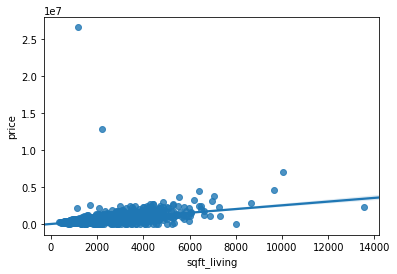

In [50]:
sns.regplot(x= house['sqft_living'], y= house['price'])

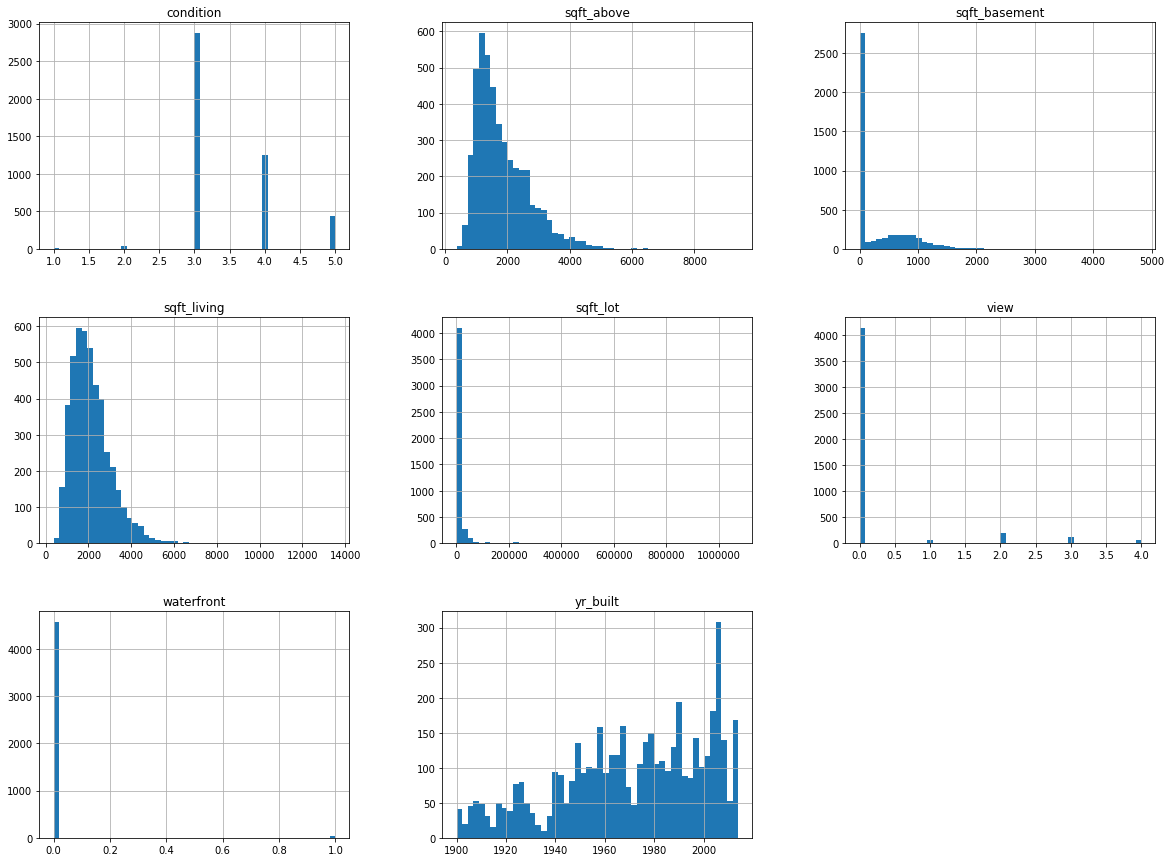

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt
house[['sqft_living','sqft_lot','waterfront','view','condition','sqft_above','sqft_basement','yr_built']].hist(bins=50, figsize=(20,15))
plt.show()

## Training and analyze models

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [68]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [69]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.5546451173318169

In [74]:
from sklearn.tree import DecisionTreeRegressor
dt_clf = DecisionTreeRegressor()
dt_clf.fit(X_train,y_train)
dt_clf.score(X_test,y_test)

0.31781417250980765

In [75]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators=40)
forest_reg.fit(X_train,y_train)
forest_reg.score(X_test,y_test)

0.5550123430029872

In [95]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train,y_train)
lasso.score(X_test,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 507967550076575.8, tolerance: 134090650221.01888
  positive)


0.5539027522425963

### As cross validation is the best method so we will use it.

In [93]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

In [71]:
# Train a Decision Tree Regressor
dt_clf = DecisionTreeRegressor(random_state = 42)
display_scores(-cross_val_score(dt_clf, X, y, cv=cv, scoring="neg_mean_absolute_error"))
display_scores(np.sqrt(-cross_val_score(dt_clf, X, y, cv=cv, scoring="neg_mean_squared_error")))

Scores: [177320.37255232 203200.07400406 187526.64269629 173108.36873584
 160667.25572527]
Mean: 180364.54274275436
Standard deviation: 14301.463651994954
Scores: [329919.53807999 941254.71146114 911007.33193852 340616.67857009
 275047.26140542]
Mean: 559569.1042910302
Standard deviation: 300274.70677426545


In [72]:
# Train a Linear Regression model
display_scores(-cross_val_score(lr_clf, X, y, cv=cv, scoring="neg_mean_absolute_error"))
display_scores(np.sqrt(-cross_val_score(lr_clf, X, y, cv=cv, scoring="neg_mean_squared_error")))

Scores: [134225.34252534 172213.55196946 160063.38391311 130956.36439592
 125921.42146667]
Mean: 144676.0128541006
Standard deviation: 18134.316700022726
Scores: [212190.31391543 913665.16121733 901598.00978966 217002.30574149
 202970.55824517]
Mean: 489485.2697818149
Standard deviation: 341466.14149665897


In [73]:
# Let's train one more model using Random Forests
forest_reg = RandomForestRegressor(n_estimators=40, random_state=42)
display_scores(-cross_val_score(forest_reg, X, y, cv=cv, scoring="neg_mean_absolute_error"))
display_scores(np.sqrt(-cross_val_score(forest_reg, X, y, cv=cv, scoring="neg_mean_squared_error")))

Scores: [127526.54110679 165101.18266587 150808.03615649 131425.91928461
 129599.44560115]
Mean: 140892.22496297973
Standard deviation: 14698.137695235899
Scores: [219090.59401566 912186.46721318 896489.43091626 284539.8676607
 239157.28631544]
Mean: 510292.72922424664
Standard deviation: 322472.9245961682


In [94]:
# Let's train one more model using Lasso
lasso = Lasso()
display_scores(-cross_val_score(lasso, X, y, cv=cv, scoring="neg_mean_absolute_error"))
display_scores(np.sqrt(-cross_val_score(lasso, X, y, cv=cv, scoring="neg_mean_squared_error")))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 515449431661681.06, tolerance: 135409422903.75407
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 156427544221399.06, tolerance: 64652877047.57293
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 164260140476871.66, tolerance: 67755102826.132195
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

Scores: [134043.34609661 172147.21340013 160171.98538431 130944.34619847
 125583.60934384]
Mean: 144578.10008467344
Standard deviation: 18225.675476432858


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 515449431661681.06, tolerance: 135409422903.75407
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 156427544221399.06, tolerance: 64652877047.57293
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 164260140476871.66, tolerance: 67755102826.132195
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

Scores: [210884.52140684 913662.84663181 901727.30565932 217006.18291695
 200743.1161681 ]
Mean: 488804.7945566048
Standard deviation: 342082.75567803654


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 517359904185551.44, tolerance: 135747582862.7138
  positive)


### From above models, Linear Regression came out to be good one with less error

## Find best model using GridSearchCV

In [88]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 516754766540895.9, tolerance: 135409422903.75407
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 156940351497584.62, tolerance: 64652877047.57293
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 165655417047678.6, tolerance: 67755102826.132195
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality ga

,model,best_score,best_params
0,linear_regression,0.399204,{'normalize': False}
1,lasso,0.403420,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.117163,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


#### So from GridSearchCV Lasso came out to be a good model.

## Test the model for few properties

In [100]:
def predict_price(city,sqft_living,bedrooms_no,bathrooms_no,waterfront,condition):    
    loc_index = np.where(X.columns==city)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft_living
    x[1] = bedrooms_no
    x[2] = bathrooms_no
    x[3] = waterfront
    x[4] = condition
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [105]:
predict_price('Sammamish',2100, 1, 1, 0,1)

2276585.5814486733

In [106]:
predict_price('Sammamish',3100, 3, 3, 1,5)

3738079.4900803016

In [107]:
predict_price('SeaTac',3100, 3, 3, 1,5)

3583508.9852409177

## Saving our model

In [113]:
import pickle
with open('Washington_city_House_prediction.pickle','wb') as f:
    pickle.dump(lasso,f)

In [115]:
import json
columns = {
    'data_cloumns': [col.lower() for col in X.columns]
}
with open('columns.json','w') as f:
    f.write(json.dumps(columns))

# Loading the model
loaded_model = pickle.load(open('Washington_city_House_prediction.pickle', 'rb'))